# Gaussian Process for Event likelihoods

## Preliminary steps

### Loading necessary packages

In [1]:
using Plots
using AugmentedGaussianProcesses
using Distributions

## Creating some random data

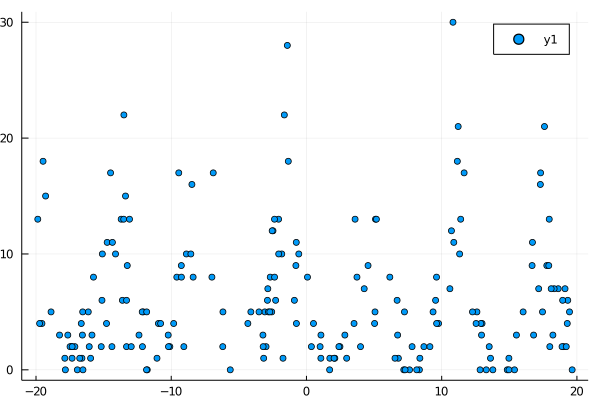

In [2]:
n_data = 200
X = (rand(n_data) .- 0.5) * 40
r = 5.0
Y = rand.(NegativeBinomial.(r, AGP.logistic.(sin.(X))))
scatter(X, Y)

## Run GP model with negative binomial likelihood to learn p

In [3]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_negbinomial = VGP(
    X, Y, kernel, NegBinomialLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_negbinomial, 20)

[ Info: Starting training Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and n_latent latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:02
  iter:  20
  ELBO:  -550.1130720407408
[ Info: Training ended after 20 iterations. Total number of iterations 20
  3.425063 seconds (7.64 M allocations: 486.542 MiB, 98.39% compilation time)


(Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference , (local_vars = (c = [0.6410002323932921, 0.5868154128634994, 0.31956206625445144, 0.20981047501435424, 0.32479069561207535, 0.32724728080237403, 0.3469246487221022, 0.2527717925412225, 0.5533969688822521, 0.12523342319737504  …  0.4225579132014421, 0.3365613268952734, 0.3807347605097381, 0.3985558922052372, 0.5218839817906852, 0.39576451514283534, 0.3832236721828177, 0.3880158597836429, 0.2686647150970689, 0.33257874304226714], θ = [2.4177764946356657, 2.43064713816476, 6.941032156048203, 4.48356468191159, 4.956505018326838, 7.929362510879363, 7.92071628821677, 8.455029359809778, 3.4133308690066144, 5.492823026018342  …  5.912288212239892, 5.448664385198744, 7.9047413167921095, 2.4674242741295034, 2.933714076349446, 13.326508636257161, 2.4698468400573312, 5.432018349245594, 3.9761121662750805, 4.9544171936887675]), opt_state = (NamedTuple(),), hyperopt_state = (NamedTu

## Running the same model but with a Poisson likelihood

In [4]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_poisson = VGP(
    X, Y, kernel, PoissonLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_poisson, 20)

[ Info: Starting training Variational Gaussian Process with a Poisson Likelihood (λ = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and n_latent latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:01
  iter:  20
  ELBO:  -691.5252636102055
[ Info: Training ended after 20 iterations. Total number of iterations 20
  2.313461 seconds (4.50 M allocations: 319.072 MiB, 10.81% gc time, 97.02% compilation time)


(Variational Gaussian Process with a Poisson Likelihood (λ = 13.284144847133266) infered by Analytic Variational Inference , (local_vars = (c = [0.78162754319526, 0.759253675147983, 0.24583005758692092, 0.19767963633406882, 0.5061165880571804, 0.25455205666795044, 0.28053828631784017, 0.164828383925908, 0.7198592589397403, 0.21354090900371497  …  0.3795945267462453, 0.26661114731138574, 0.329033331279314, 0.5916577909809441, 0.6899018105088853, 0.3454260361594437, 0.572572452850095, 0.3360473667513639, 0.41401780658005616, 0.44240290178526703], θ = [4.273606829322816, 4.27435928891516, 7.4911796264941355, 5.4240578319577795, 6.451137573932071, 8.458422923154314, 8.367728005714888, 9.089353609362886, 5.18621870100366, 6.588890846706668  …  6.159078832895504, 5.887578336841816, 8.253361580513085, 4.119353443269693, 4.673898131113258, 13.645389449692958, 4.079710747792909, 5.758952812881778, 5.332950984343306, 6.302575790843038], γ = [8.97800029068996, 8.955496904844935, 6.05773504881302,

Prediction and plot function on a grid
Create a grid and compute prediction on it

In [5]:
function compute_grid(model, n_grid=50)
    mins = -20
    maxs = 20
    x_grid = range(mins, maxs; length=n_grid) # Create a grid
    y_grid, sig_y_grid = proba_y(model, reshape(x_grid, :, 1)) # Predict the mean and variance on the grid
    return y_grid, sig_y_grid, x_grid
end

compute_grid (generic function with 2 methods)

Plot the data as a scatter plot

In [6]:
function plot_data(X, Y)
    return Plots.scatter(X, Y; alpha=0.33, msw=0.0, lab="", size=(800, 500))
end

function plot_model(model, X, Y, title=nothing)
    n_grid = 100
    y_grid, sig_y_grid, x_grid = compute_grid(model, n_grid)
    p = plot_data(X, Y)
    Plots.plot!(
        p,
        x_grid,
        y_grid;
        ribbon=2 * sqrt.(sig_y_grid), # Plot 2 std deviations
        title=title,
        color="red",
        lab="",
        linewidth=3.0,
    )
    return p
end;

## Comparison between the two likelihoods

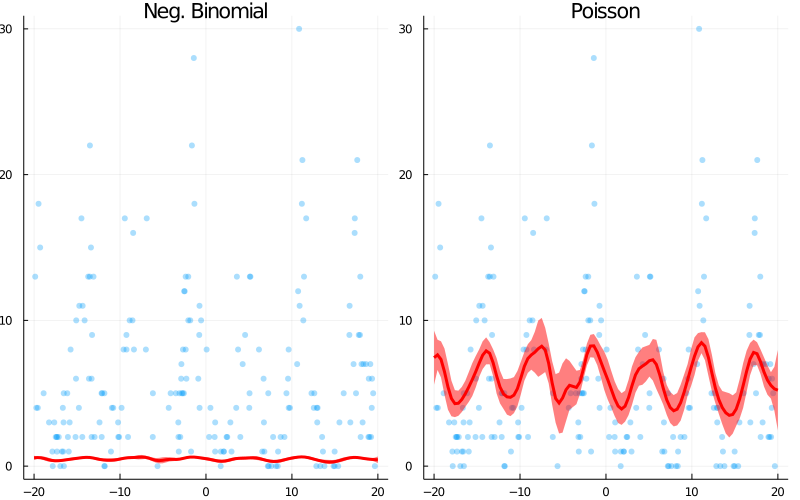

In [7]:
Plots.plot(
    plot_model.(
        [m_negbinomial, m_poisson], Ref(X), Ref(Y), ["Neg. Binomial", "Poisson"]
    )...;
    layout=(1, 2),
)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*